In [2]:
import time 
from bs4 import BeautifulSoup
import requests
import pandas as pd
import random
import datetime
import csv
import undetected_chromedriver as uc
import pandas as pd


initial_url = 'http://liuyan.people.com.cn/home'
driver = uc.Chrome()
driver.get(initial_url)



In [100]:
rearch_keyword = '停气'

In [102]:
#search box /html/body/div[1]/aside/div[1]/div[2]/div/div[1]/input
search_box = driver.find_element('xpath', '/html/body/div[1]/aside/div[1]/div[2]/div/div[1]/input')
search_box.send_keys(rearch_keyword)

search_button = driver.find_element('xpath', '/html/body/div[1]/aside/div[1]/div[2]/span')
search_button.click()


In [ ]:
#choose order /html/body/div[4]/div[1]/div[1]/ul/li[2]/span 时间倒序
click_order_btn_1 = driver.find_element('xpath', '/html/body/div[1]/div[2]/main/div/div/div[3]/div/form/div/div[7]/div/div/input')
click_order_btn_1.click()

time.sleep(1)
click_order_btn_2 = driver.find_element('xpath', '/html/body/div[4]/div[1]/div[1]/ul/li[2]/span')
click_order_btn_2.click()


In [60]:
page_entries = []
single_entry = {}

In [30]:
clik_more_times = 20
ID_num = 0
entry_count = 0
page_entries = []
single_entry = {}

for click_times in range(clik_more_times):

    content = BeautifulSoup(driver.page_source, 'html.parser')
    replyIDs = content.find_all('span', class_='t-mr1 t-ml1')
    total_entry_num = len(replyIDs)

    page_entries = []
    
    for i in replyIDs[entry_count:total_entry_num]:

        single_entry = {}
        
        replyID = i.text
        replyID = replyID[3:]
        # print(replyID)

        reply_object = content.find_all('div', class_='replyObject')
        reply_object = reply_object[ID_num].text[5:]
        # print(reply_object)
        # print(ID_num)

        tabList = content.find_all('div', class_='tabList')
        tabList = tabList[ID_num].text.split(' ', 2)
        replyInfoHead = tabList[0]
        typeNameD = tabList[1]
        stateInfo = tabList[2]
        # print(replyInfoHead)
        # print(typeNameD)
        # print(stateInfo)
        single_url = 'http://liuyan.people.com.cn/threads/content?tid=' + replyID + '&from=search'
        # print(single_url)

        headMainS_fl = content.find_all('div', class_='headMainS fl')[ID_num].text.split(' ', 2)[0]
        #replace "&nbsp;" with space
        replyDate = headMainS_fl[15:]
        replyDate = replyDate.replace(u'\xa0', u' ')
        # print(headMainS_fl)
        print(replyDate)

        ID_num += 1

        single_entry['replyID'] = replyID
        single_entry['replyDate'] = replyDate
        single_entry['reply_object'] = reply_object
        single_entry['replyInfoHead'] = replyInfoHead
        single_entry['typeNameD'] = typeNameD
        single_entry['stateInfo'] = stateInfo
        single_entry['single_url'] = single_url

        page_entries.append(single_entry)

        with open('page_entries.csv', 'a', encoding='utf-8-sig', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(single_entry.values())
    
    entry_count = entry_count + 10
    print(entry_count)

    #click "more" btn /html/body/div[1]/div[2]/main/div/div/div[3]/div/div[3] 加载更多

    click_more_btn = driver.find_element('xpath', '/html/body/div[1]/div[2]/main/div/div/div[3]/div/div[3]')
    click_more_btn.click()
    
    time.sleep(random.randint(2, 5))




2022-01-01 05:50
2022-01-01 11:41
2022-01-01 22:59
2022-01-01 23:57
2022-01-02 21:35
2022-01-03 07:02
2022-01-03 07:23
2022-01-04 10:03
2022-01-04 18:39
2022-01-04 19:23
2022-01-01 05:50
2022-01-01 11:41
2022-01-01 22:59
2022-01-01 23:57
2022-01-02 21:35
2022-01-03 07:02
2022-01-03 07:23
2022-01-04 10:03
2022-01-04 18:39
2022-01-04 19:23
10
2022-01-04 19:35
2022-01-04 19:50
2022-01-04 19:57
2022-01-04 21:13
2022-01-04 21:25
2022-01-04 21:28
2022-01-04 21:37
2022-01-04 22:03
2022-01-04 22:24
2022-01-04 22:55


IndexError: list index out of range

In [113]:
#read page_entries_hebei.csv and remove duplicates and save as page_entries_hebei_unique.csv
df = pd.read_csv('page_entries_hebei.csv', encoding='utf-8-sig')
print(len(df))

#adding header
df.columns = ['replyID', 'replyDate', 'reply_object', 'replyInfoHead', 'typeNameD', 'stateInfo', 'single_url']

#remove duplicates
df = df.drop_duplicates(subset=['replyID'])
print(len(df))

df.to_csv('page_entries_hebei_unique.csv', encoding='utf-8-sig', index=False)

486
339


In [6]:
#read page_entries.csv and remove duplicates
df = pd.read_csv('page_entries.csv', encoding='utf-8-sig')
print(len(df))

#reading header
df.columns = ['replyID', 'replyDate', 'reply_object', 'replyInfoHead', 'typeNameD', 'stateInfo', 'single_url']

df


1056


,replyID,replyDate,reply_object,replyInfoHead,typeNameD,stateInfo,single_url
0,17193453,2023-01-23 10:19,山西省长治市长子县委书记,关于天然气停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...
1,17167343,2023-01-16 19:26,山西省长治市上党区委书记,郝家庄镇岭上村供气不足供暖不足,投诉/求助,办理中,http://liuyan.people.com.cn/threads/content?ti...
2,17163718,2023-01-16 02:38,山西省太原市尖草坪区委书记,西留庄留苑小区暖气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...
3,17038159,2022-12-28 05:10,山西省晋中市灵石县委书记,煤气公司每年腊月基本白天都在停气！,投诉/求助,已办理,http://liuyan.people.com.cn/threads/content?ti...
4,16999145,2022-12-23 08:37,山西省委书记蓝佛安,关于洪洞县堤村乡干河村天然气每晚停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...
...,...,...,...,...,...,...,...
1051,16840497,2022-12-05 03:35,河北省委书记倪岳峰,农村天然气取暖,建言,已办理,http://liuyan.people.com.cn/threads/content?ti...
1052,16841053,2022-12-05 04:28,河北省委书记倪岳峰,我村经常停天然气,建言,已办理,http://liuyan.people.com.cn/threads/content?ti...
1053,16844344,2022-12-05 09:53,河北省邯郸市市长樊成华,鸡泽县中燃公司,限购天然气。经常停气，,投诉/求助 已办理,http://liuyan.people.com.cn/threads/content?ti...
1054,16845394,2022-12-05 17:23,河北省保定市委书记党晓龙,煤改气,投诉/求助,已办理,http://liuyan.people.com.cn/threads/content?ti...


In [7]:
df['replyDate'] = pd.to_datetime(df.replyDate)



<AxesSubplot: >

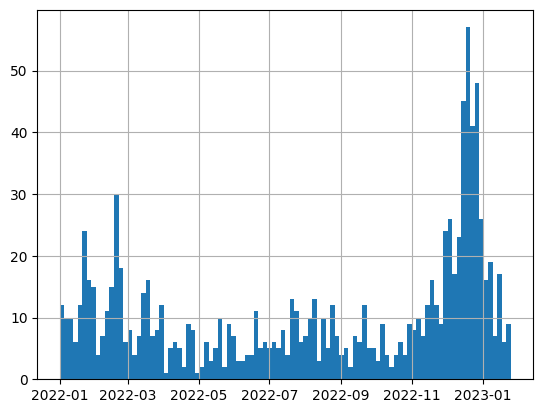

In [9]:
#plot the histogram
df['replyDate'].hist(bins=100)


In [10]:
df['reply_object'] = df['reply_object'].str.replace('\n', '')
df.reply_object

0        山西省长治市长子县委书记
1        山西省长治市上党区委书记
2       山西省太原市尖草坪区委书记
3        山西省晋中市灵石县委书记
4           山西省委书记蓝佛安
            ...      
1051        河北省委书记倪岳峰
1052        河北省委书记倪岳峰
1053      河北省邯郸市市长樊成华
1054     河北省保定市委书记党晓龙
1055      河北省保定市市长闫继红
Name: reply_object, Length: 1056, dtype: object

In [11]:
import cpca


In [14]:
df2 = cpca.transform(df['reply_object'], pos_sensitive=False)
df['province'] = df2['省']
df['city'] = df2['市']
df['county'] = df2['区']
df['zipcode'] = df2['adcode']

In [17]:
df.to_csv('page_entries_location.csv', encoding='utf-8-sig', index=False)

In [18]:
df_loc = pd.read_csv('page_entries_location.csv', encoding='utf-8-sig')

In [20]:
df_loc.columns = ['replyID', 'replyDate', 'reply_object', 'replyInfoHead', 'typeNameD', 'stateInfo', 'single_url', 'province', 'city', 'county', 'zipcode']

In [21]:
df_loc

,replyID,replyDate,reply_object,replyInfoHead,typeNameD,stateInfo,single_url,province,city,county,zipcode
0,17193453,2023-01-23 10:19:00,山西省长治市长子县委书记,关于天然气停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,长治市,长子县,140428
1,17167343,2023-01-16 19:26:00,山西省长治市上党区委书记,郝家庄镇岭上村供气不足供暖不足,投诉/求助,办理中,http://liuyan.people.com.cn/threads/content?ti...,山西省,长治市,NaN,140400
2,17163718,2023-01-16 02:38:00,山西省太原市尖草坪区委书记,西留庄留苑小区暖气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,太原市,尖草坪区,140108
3,17038159,2022-12-28 05:10:00,山西省晋中市灵石县委书记,煤气公司每年腊月基本白天都在停气！,投诉/求助,已办理,http://liuyan.people.com.cn/threads/content?ti...,山西省,晋中市,灵石县,140729
4,16999145,2022-12-23 08:37:00,山西省委书记蓝佛安,关于洪洞县堤村乡干河村天然气每晚停气,投诉/求助,待回复,http://liuyan.people.com.cn/threads/content?ti...,山西省,NaN,NaN,140000
...,...,...,...,...,...,...,...,...,...,...,...
1051,16840497,2022-12-05 03:35:00,河北省委书记倪岳峰,农村天然气取暖,建言,已办理,http://liuyan.people.com.cn/threads/content?ti...,河北省,NaN,NaN,130000
1052,16841053,2022-12-05 04:28:00,河北省委书记倪岳峰,我村经常停天然气,建言,已办理,http://liuyan.people.com.cn/threads/content?ti...,河北省,NaN,NaN,130000
1053,16844344,2022-12-05 09:53:00,河北省邯郸市市长樊成华,鸡泽县中燃公司,限购天然气。经常停气，,投诉/求助 已办理,http://liuyan.people.com.cn/threads/content?ti...,河北省,邯郸市,NaN,130400
1054,16845394,2022-12-05 17:23:00,河北省保定市委书记党晓龙,煤改气,投诉/求助,已办理,http://liuyan.people.com.cn/threads/content?ti...,河北省,保定市,NaN,130600


In [22]:
df_all_pages = pd.read_csv('all_pages.csv', encoding='utf-8-sig')

In [25]:
# df.columns = ['replyID', 'replyDate', 'reply_object', 'replyInfoHead', 'typeNameD', 'stateInfo', 'single_url']
